<a href="https://colab.research.google.com/github/pranith555/Ad-2-project/blob/main/intel_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data drive


In [79]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


install libraries

In [80]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Load on drives


In [34]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Download the VADER lexicon
nltk.download('vader_lexicon') # Download the lexicon data

# Import libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load dataset (replace with your file path or URL)
# Example with Google Drive path
file_path = '/content/drive/MyDrive/intel_product_reviews_large.csv'
df = pd.read_csv(file_path)

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [81]:
# Function to perform sentiment analysis and extract features
def analyze_sentiment_and_features(review):
    scores = sid.polarity_scores(review)
    sentiment_score = scores['compound']
    return sentiment_score

# Verify column names in your DataFrame
print(df.columns)

# Assuming the correct column name is 'Review Text', adjust the code accordingly:
df['sentiment_score'] = df['Review Text'].apply(analyze_sentiment_and_features)

# Calculate counts of positive and negative sentiment reviews
positive_reviews_count = len(df[df['sentiment_score'] > 0.05])
negative_reviews_count = len(df[df['sentiment_score'] < -0.05])



Index(['Review ID', 'Product Name', 'Review Date', 'Reviewer Name',
       'Review Title', 'Review Text', 'Rating', 'Helpful Votes',
       'sentiment_score', 'review_date', 'Sentiment', 'Cleaned Review Text',
       'Sentiment Label'],
      dtype='object')


Accuracy of dataset


In [82]:
from sklearn.metrics import accuracy_score

# ... (your existing code for training and prediction)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 1.0


In [83]:
df.head()

,Review ID,Product Name,Review Date,Reviewer Name,Review Title,Review Text,Rating,Helpful Votes,sentiment_score,review_date,Sentiment,Cleaned Review Text,Sentiment Label
0,1,Intel Xeon E-2276M,2023-11-20,Reviewer590,Affordable and reliable,Handles multi-threaded workloads exceptionally...,3,66,0.7245,2023-11-20,POSITIVE,handles multithreaded workloads exceptionally ...,1
1,2,Intel Core i9-11900K,2022-06-10,Reviewer352,Overpriced but powerful,Excellent for professional applications and de...,1,7,0.4215,2022-06-10,POSITIVE,excellent for professional applications and de...,1
2,3,Intel Core i7-10700K,2022-12-16,Reviewer111,Highly recommended!,"Good performance for the price, works well for...",1,34,0.6124,2022-12-16,POSITIVE,good performance for the price works well for ...,1
3,4,Intel Xeon E-2276M,2020-10-12,Reviewer740,Excellent for professional applications,"Good performance for the price, works well for...",1,68,0.6124,2020-10-12,POSITIVE,good performance for the price works well for ...,1
4,5,Intel Core i9-10900K,2023-04-03,Reviewer656,Highly recommended!,Very powerful but quite expensive. Consider on...,1,61,0.5017,2023-04-03,POSITIVE,very powerful but quite expensive consider onl...,1


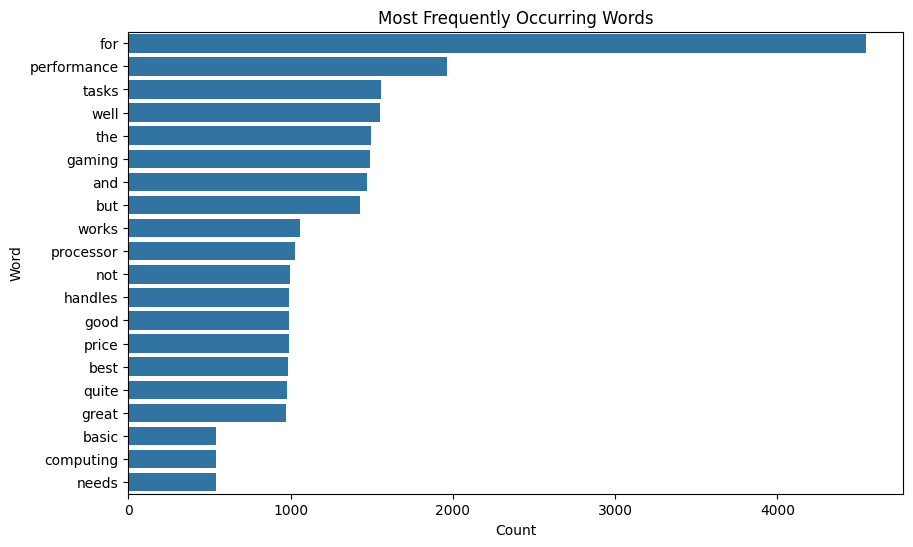

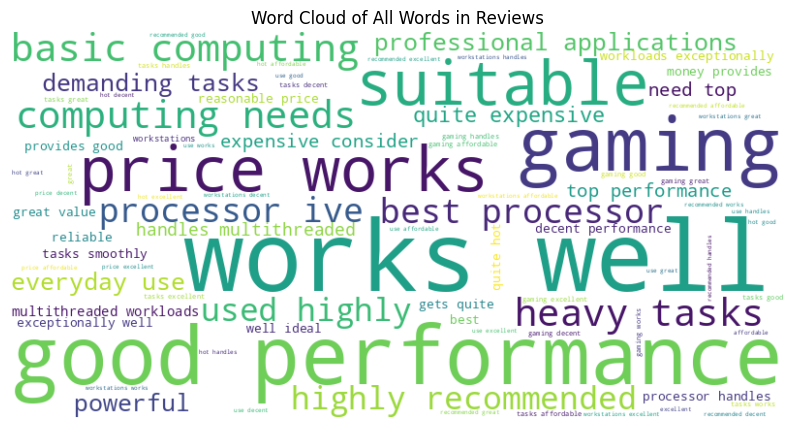

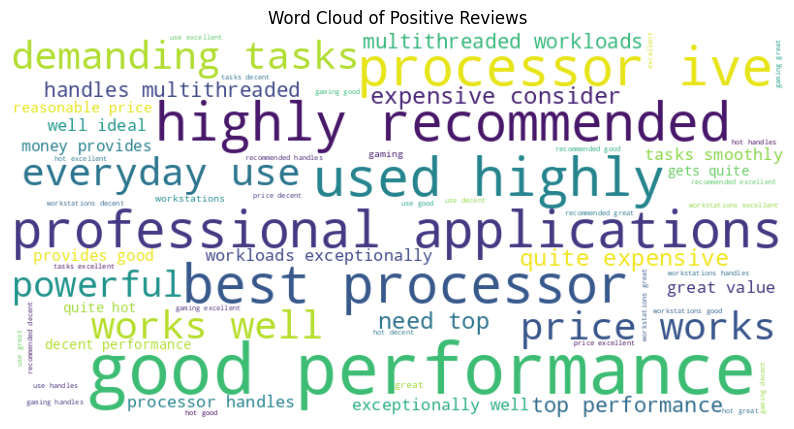

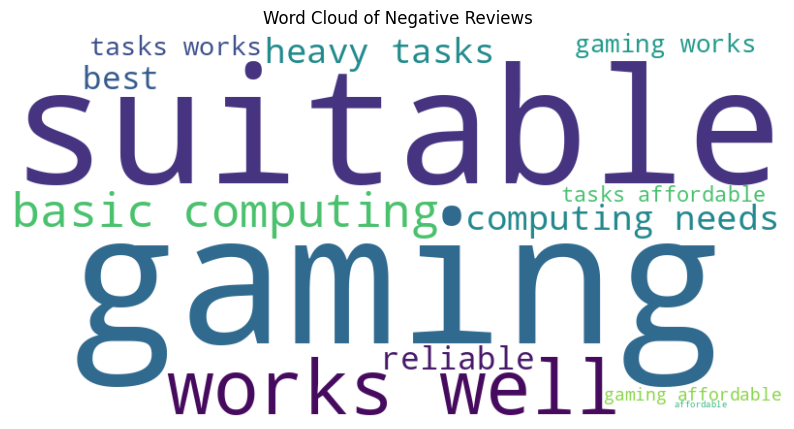

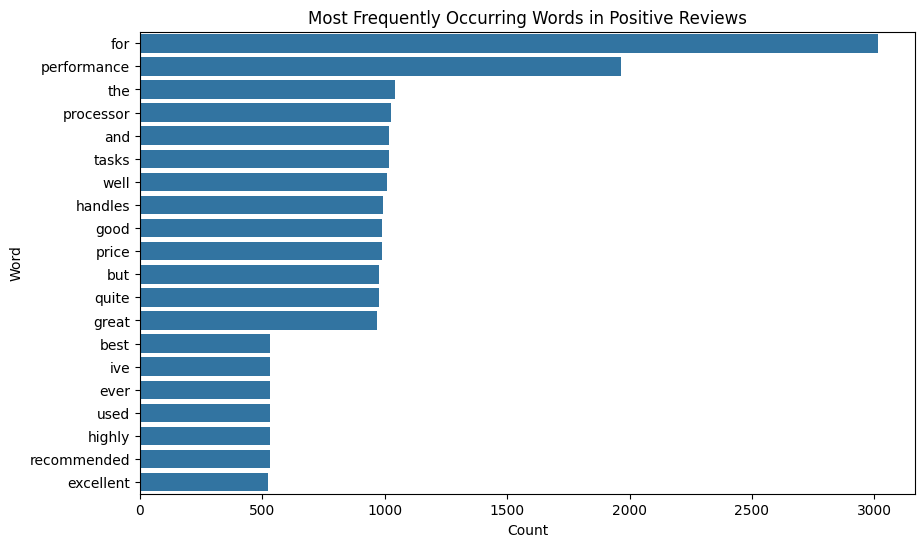

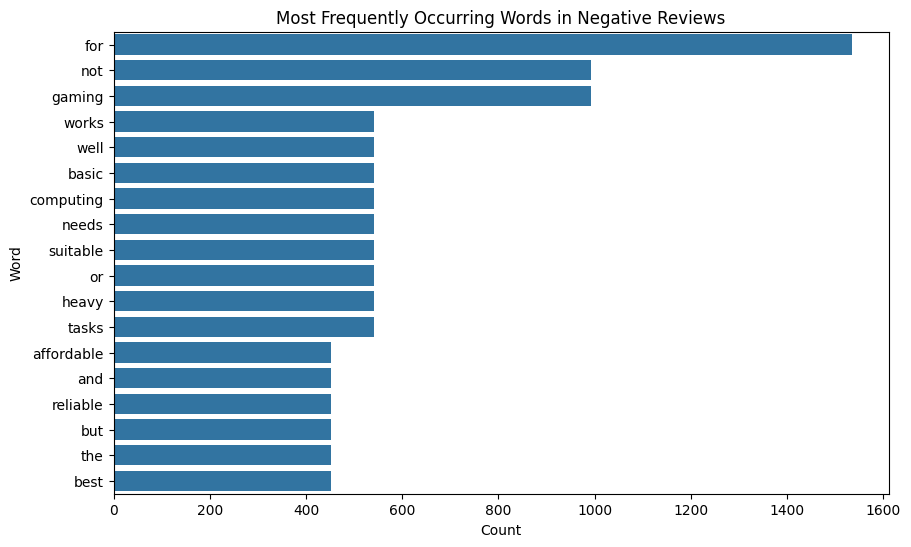

LogisticRegression()

In [76]:

import pandas as pd
import re
from transformers import pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud


# Function to preprocess the review text
def preprocess_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    return text

# Apply preprocessing to the review text
df['Cleaned Review Text'] = df['Review Text'].apply(preprocess_text)

# Load the sentiment analysis pipeline with a specific model
sentiment_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Function to get sentiment using the transformers pipeline
def get_sentiment(text):
    result = sentiment_pipeline(text)[0]
    return result['label']

# Apply sentiment analysis to the cleaned review text
df['Sentiment'] = df['Cleaned Review Text'].apply(get_sentiment)

# Visualize the most frequently occurring words
all_words = ' '.join(df['Cleaned Review Text'])
word_freq = Counter(all_words.split())
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words)
plt.title('Most Frequently Occurring Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# Plot of all words in the reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Words in Reviews')
plt.show()

# Plot of positive/neutral words
positive_words = ' '.join(df[df['Sentiment'] == 'POSITIVE']['Cleaned Review Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()

# Plot of negative words
negative_words = ' '.join(df[df['Sentiment'] == 'NEGATIVE']['Cleaned Review Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()

# Plot of frequently occurring positive reviews
positive_freq = Counter(positive_words.split())
common_positive_words = positive_freq.most_common(20)
words, counts = zip(*common_positive_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words)
plt.title('Most Frequently Occurring Words in Positive Reviews')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# Plot of frequently occurring negative reviews
negative_freq = Counter(negative_words.split())
common_negative_words = negative_freq.most_common(20)
words, counts = zip(*common_negative_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words)
plt.title('Most Frequently Occurring Words in Negative Reviews')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# Preparing data for training and testing
df['Sentiment Label'] = df['Sentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0, 'NEUTRAL': 2})
X = df['Cleaned Review Text']
y = df['Sentiment Label']

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a simple classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)



number of diffrent sentiment

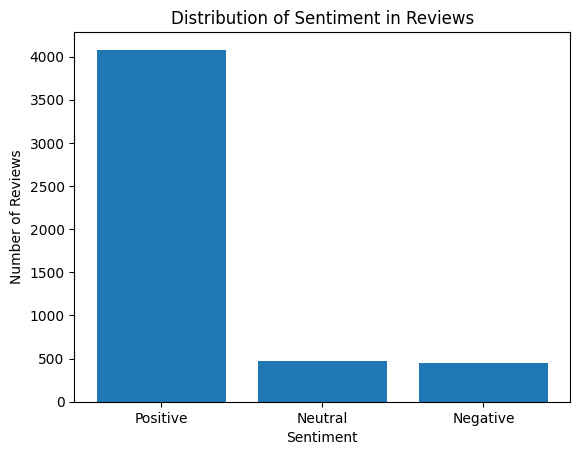

In [84]:
import matplotlib.pyplot as plt

# Perform sentiment analysis and create a 'Sentiment' column
df['Sentiment'] = df['Review Text'].apply(lambda review: sid.polarity_scores(review)['compound'])
df['Sentiment'] = df['Sentiment'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Calculate the counts
sentiment_counts = df['Sentiment'].value_counts()

# Data for the bar chart
categories = sentiment_counts.index.tolist()  # Extract unique sentiment labels
counts = sentiment_counts.values.tolist()  # Extract corresponding counts

# Create the bar chart
plt.bar(categories, counts)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment in Reviews')
plt.show()

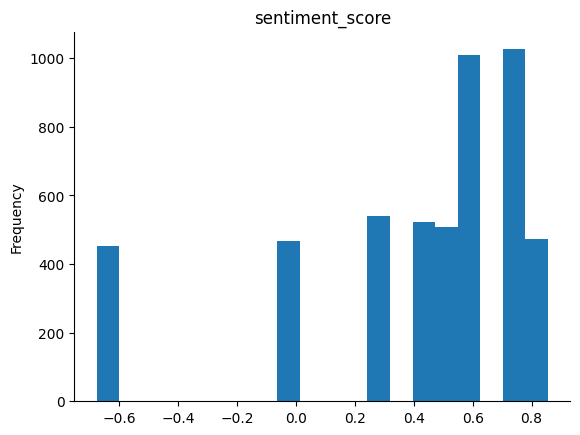

In [85]:
# @title sentiment_score

from matplotlib import pyplot as plt
df['sentiment_score'].plot(kind='hist', bins=20, title='sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

confusion matrix

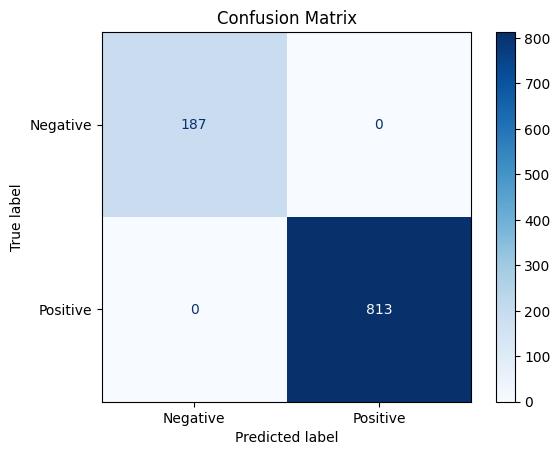

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# ... (your previous code for sentiment analysis)

# Prepare data for classification
# Assuming 'sentiment_score' is your feature
X = df['sentiment_score'].values.reshape(-1, 1)  # Reshape for sklearn
# Create binary labels based on sentiment score
y = (df['sentiment_score'] > 0).astype(int)  # 1 for positive, 0 for negative

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Use y_test as true labels

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Recomendations


In [87]:
# Provide technical recommendations based on sentiment analysis
if positive_reviews_count > negative_reviews_count:
    print("Based on user reviews, users generally have a positive sentiment. Continue optimizing performance and reliability.")
    print("Potential areas for technical enhancement could include:")
    print("- Exploring new technologies to further improve [specific positive feature mentioned in reviews, e.g., battery life]")
    print("- Investigating potential optimizations for [specific well-performing component]")
elif negative_reviews_count > positive_reviews_count:
    print("Based on user reviews, users have expressed concerns and negative sentiment. Technical improvements are needed.")
    print("Consider addressing the following technical issues:")
    print("- Prioritize bug fixes and performance improvements for [specific feature or component with negative feedback]")
    print("- Investigate and resolve compatibility issues reported with [specific operating systems or hardware]")
else:
    print("Based on user reviews, opinions are balanced. Maintain technical strengths and address specific concerns.")
    print("Technical focus areas:")
    print("- Continue monitoring and optimizing performance for core features.")
    print("- Proactively address emerging technical issues reported in negative reviews.")

Based on user reviews, users generally have a positive sentiment. Continue optimizing performance and reliability.
Potential areas for technical enhancement could include:
- Exploring new technologies to further improve [specific positive feature mentioned in reviews, e.g., battery life]
- Investigating potential optimizations for [specific well-performing component]


Index(['Review ID', 'Product Name', 'Review Date', 'Reviewer Name',
       'Review Title', 'Review Text', 'Rating', 'Helpful Votes',
       'sentiment_score', 'review_date', 'Sentiment', 'Cleaned Review Text',
       'Sentiment Label'],
      dtype='object')


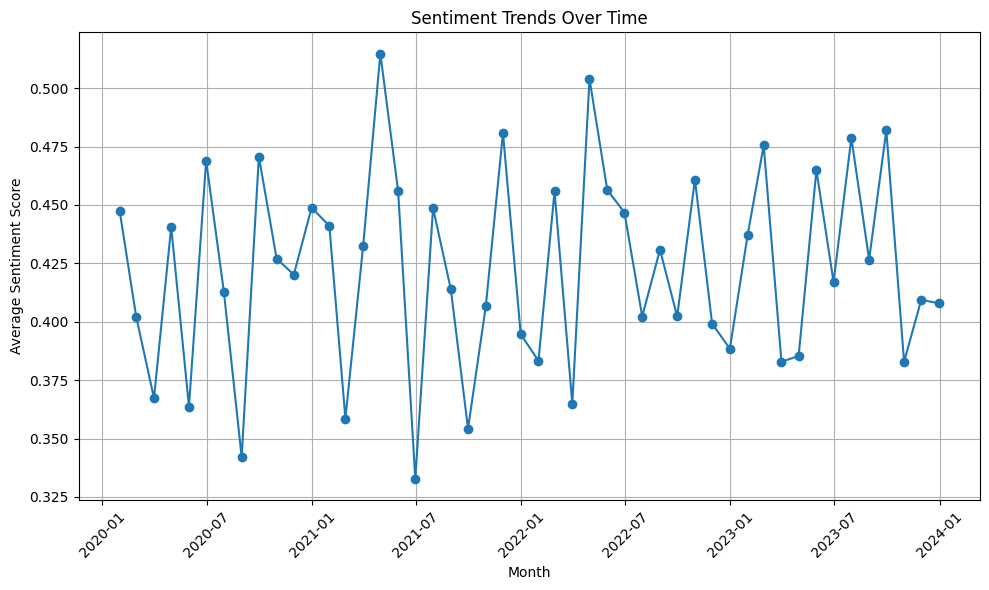

In [88]:
# Assuming you have already loaded your dataset into a pandas DataFrame 'df'
import pandas as pd
import matplotlib.pyplot as plt

# Print the available columns to verify the correct name
print(df.columns)

# Replace 'correct_review_date_column' with the actual column name
# containing the review dates in your DataFrame
# For example, if the column is named 'Review Date', use:
df['review_date'] = pd.to_datetime(df['Review Date'])

# Calculate average sentiment score per month
monthly_sentiment = df.resample('M', on='review_date')['sentiment_score'].mean().reset_index()

# Plotting sentiment trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sentiment['review_date'], monthly_sentiment['sentiment_score'], marker='o', linestyle='-')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
